In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns
from astropy.time import Time
import scipy.optimize as fit

# 1 - curve fitting guided problem

In [2]:
# 1a

temps = pd.read_csv('temps.csv')
temps = temps.loc[:,['dt','AverageTemperature','State']]
temps['dt']=pd.to_datetime(temps['dt'])
temps=temps[temps['dt'].dt.year>2000]
temps=temps[temps['State'].isin(['Wyoming', 'Nebraska', 'South Dakota'])]
temps

,dt,AverageTemperature,State
350773,2001-01-01,-2.592,Nebraska
350774,2001-02-01,-5.575,Nebraska
350775,2001-03-01,2.077,Nebraska
350776,2001-04-01,10.431,Nebraska
350777,2001-05-01,15.878,Nebraska
...,...,...,...
626435,2013-05-01,10.607,Wyoming
626436,2013-06-01,16.267,Wyoming
626437,2013-07-01,20.222,Wyoming
626438,2013-08-01,19.621,Wyoming


In [3]:
# 1b

grouped=temps.groupby(['dt'])['AverageTemperature'].mean().reset_index()   

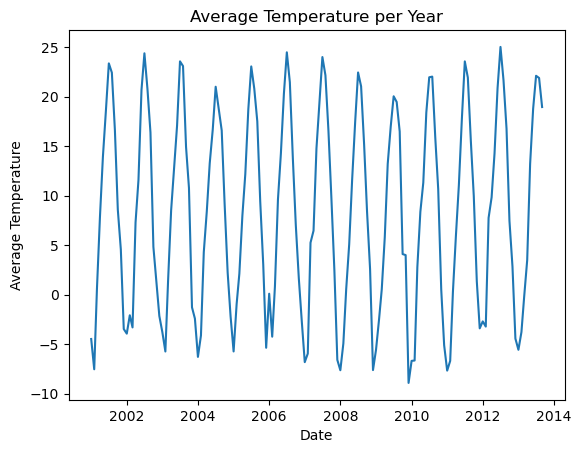

In [4]:
# 1c

plt.figure()
plt.plot(grouped['dt'], grouped['AverageTemperature'])
plt.xlabel('Date')
plt.ylabel('Average Temperature')
plt.title('Average Temperature per Year')
plt.show()

In [5]:
# 1d
# i already converted the data into timestamps in order to filter by year. i will now convert to julian date and then years

grouped['dt']=Time(grouped['dt']).jd/365.25
grouped

,dt,AverageTemperature
0,6712.965092,-4.480333
1,6713.049966,-7.541000
2,6713.126626,0.590333
3,6713.211499,7.889000
4,6713.293634,13.908667
...,...,...
148,6725.293634,13.196000
149,6725.378508,18.783667
150,6725.460643,22.110333
151,6725.545517,21.890000


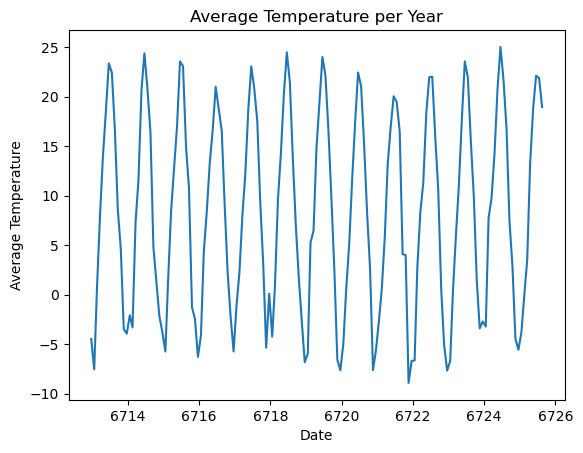

In [6]:
plt.figure()
plt.plot(grouped['dt'], grouped['AverageTemperature'])
plt.xlabel('Date')
plt.ylabel('Average Temperature')
plt.title('Average Temperature per Year')
plt.show()

In [7]:
# 1e 

def f(x, a, b, c, d):
    return a*np.sin(b*x+c)+d

p0 = [20, 6, 0.3, 8]

In [8]:
# 1f

parameters, covariance_matrix = fit.curve_fit(f, grouped['dt'], grouped['AverageTemperature'], p0)
parameters

array([  -13.89833752,     6.28288274, -1900.0303798 ,     8.17492241])

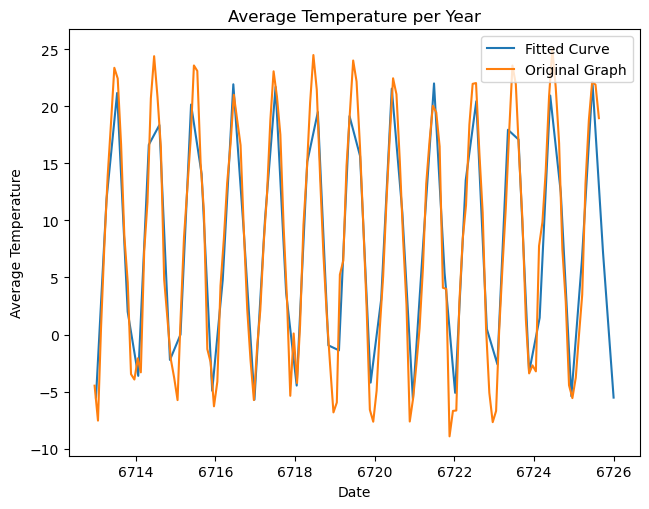

In [9]:
# 1g

a_fit = parameters[0]
b_fit = parameters[1]
c_fit = parameters[2]
d_fit = parameters[3]

xpred= np.linspace(6713,6726)
y=f(xpred, a_fit, b_fit, c_fit, d_fit)
plt.plot(xpred, y, label="Fitted Curve")
plt.plot(grouped['dt'], grouped['AverageTemperature'], label="Original Graph")
plt.legend(loc="upper right")
plt.tight_layout()
plt.xlabel('Date')
plt.ylabel('Average Temperature')
plt.title('Average Temperature per Year')
plt.show()

In [10]:
# 1h

covariance_matrix
a_error = np.sqrt(covariance_matrix[0,0])
b_error = np.sqrt(covariance_matrix[1,1])
c_error = np.sqrt(covariance_matrix[2,2])
d_error = np.sqrt(covariance_matrix[3,3])

print("Parameter a =",a_fit, "±", a_error)
print("Parameter b =",b_fit, "±", b_error)
print("Parameter c =",c_fit, "±", c_error)
print("Parameter d =",d_fit, "±", d_error)
print()
print(f"Final equation = {a_fit}*sin({b_fit}*x{c_fit})+{d_fit}")



Parameter a = -13.898337518072328 ± 0.2590580338760429
Parameter b = 6.282882740117833 ± 0.004488455236063022
Parameter c = -1900.0303797983586 ± 30.159271630707927
Parameter d = 8.174922414114947 ± 0.16069855574157763

Final equation = -13.898337518072328*sin(6.282882740117833*x-1900.0303797983586)+8.174922414114947


# 2 - random plotting practice

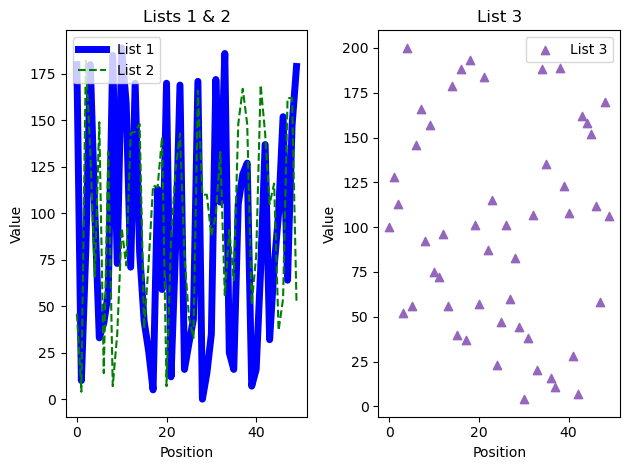

In [11]:
list1 = np.random.randint(0, 201, 50)
list2 = np.random.randint(0, 201, 50)
list3 = np.random.randint(0, 201, 50)

fig, (ax1, ax2) = plt.subplots(1,2)
ax1.plot(list1, color='b', linewidth=5, label="List 1")
ax1.plot(list2, color='g', linestyle='--', label="List 2")
ax1.legend(loc="upper left")
ax1.set_title("Lists 1 & 2")
ax2.scatter(range(0, len(list3)), list3, marker='^', c='tab:purple', label="List 3")
ax2.legend()
ax2.set_title("List 3")
ax2.set_xlabel("Position")
ax1.set_xlabel("Position")
ax1.set_ylabel("Value")
ax2.set_ylabel("Value")
plt.tight_layout()

# 3 - monte carlo

if N=10, then the estimate of π is 3.6
if N=1000, then the estimate of π is 3.124
if N=100000, then the estimate of π is 3.14536
if N=1000000, then the estimate of π is 3.1418


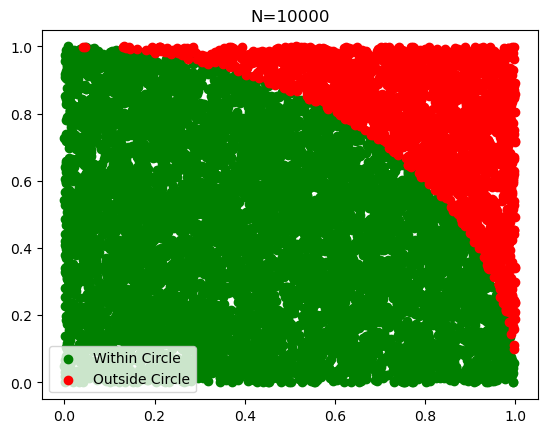

In [69]:
def monte_carlo(N):
    x = np.random.rand(N)
    y = np.random.rand(N)
    x_inside=[]
    y_inside=[]
    x_outside=[]
    y_outside=[]
    within_circle=[]
    counter=0
    for i in (x**2 + y**2):
        if i <=1:
            within_circle.append(i)
            x_inside.append(x[counter])
            y_inside.append(y[counter])
            counter=counter+1
        else:
            x_outside.append(x[counter])
            y_outside.append(y[counter])
            counter=counter+1
            
    pi=4*len(within_circle)/N
    return print(f"if N={N}, then the estimate of π is {pi}")

monte_carlo(10)
monte_carlo(10**3)
monte_carlo(10**5)
monte_carlo(10**6)

# the estimate is getting more and more accurate the numbers you use!
def graphing_monte_carlo(N):
    x = np.random.rand(N)
    y = np.random.rand(N)
    x_inside=[]
    y_inside=[]
    x_outside=[]
    y_outside=[]
    within_circle=[]
    counter=0
    for i in (x**2 + y**2):
        if i <=1:
            within_circle.append(i)
            x_inside.append(x[counter])
            y_inside.append(y[counter])
            counter=counter+1
        else:
            x_outside.append(x[counter])
            y_outside.append(y[counter])
            counter=counter+1

    pi=4*len(within_circle)/N
    plt.figure()
    plt.scatter(x_inside,y_inside, c='g', label="Within Circle")
    plt.scatter(x_outside,y_outside,c='r', label="Outside Circle")
    plt.title(f"N={N}")
    plt.legend()
    return 
graphing_monte_carlo(10**4)
